## Введение в анализ данных, ИАД-4

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил: Пешков Максим

### Общая информация

__Дата выдачи:__ 08.02.2020

__Дедлайн:__ 18.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждую задачу сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) дается 0.5 бонусных балла. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [2]:
def result_mark(weights: np.array, marks: np.array):
    return int(weights @ marks.T)    

In [3]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [4]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [5]:
def change_array(array: np.array, number: int) -> np.array:
    array[::3] = number
    return array

In [6]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
change_array(array, number)
assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [7]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [8]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    array3 = abs(array1-array2)
    return np.where(array3 <= precision)[0]

In [9]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [10]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [11]:
def block_matrix(block: np.array) -> np.array:
    block2 = np.hstack((block, block))
    return np.vstack((block2, block2))

In [12]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [13]:
def diag_prod(matrix: np.array) -> int:
    res = np.diagonal(matrix, offset = 0)
    mat = res[res != 0]
    return mat.prod()

In [14]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [15]:
def normalize(matrix: np.array) -> np.array:
    return (matrix - np.mean(matrix, axis = 0)) / np.std(matrix, axis = 0)

In [16]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [17]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [18]:
def antiderivative(coefs: np.array) -> np.array:
    ind = np.arange(1, len(coefs) + 1)[::-1]
    return np.append(coefs / ind, 0)

In [19]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [20]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [21]:
def make_symmetric(matrix: np.array) -> np.array:
    matrix2 = np.diag(np.diag(matrix))
    res = matrix + matrix.T - matrix2
    return res

In [22]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [23]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [24]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    return np.vstack([np.arange(a, b + 1)] * m)

In [25]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [26]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [27]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return sum(vec1 * vec2) / ((sum(vec1 ** 2)) * (sum(vec2 ** 2))) ** (0.5)

In [28]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [29]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [84]:
data = pd.read_csv('train.csv', delimiter=',')
data.shape

(891, 12)

In [85]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

```sh
PassengerId - порядковый
Survived - бинарный
Pclass - категориальный
Name - можно считать категориальным, просто у каждого своя категория
Sex - категориальный (можно сделать бинарным)
Age - вещественный
SibSp - вещественный
Parch - вещественный
Ticket - категориальный, но как и с именем у каждого свой
Fare - вещественный
Cabin - категориальный (очень много категорий)
Embarked - категориальный
```

1. Посмотреть на зависимость между стоимостью билета (Fare) и возрастом (Age), верно ли, что чем старше пассажир, тем дороже у него билет?
2. Разбить на классы пассажиров в зависимости от качества билета (Pclass) и количества близких людей на борту(Parch): люкс - 1 класс билета и более 2 близких на борту, средние - 2 класс билета и хотя бы 2 близких на борту или 1 класс и не более 2 близких, обычные - 2 класс и не более 1 близкого или 3 класс
3. Классифицировать пассажиров в зависимости от их возраста на детей (до 18 лет), зрелых (18-50 лет) и пенсионеров(больше 50 лет).
 

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [64]:
s = data[data['Survived'] == 1].shape[0] / data.shape[0]
m = data[(data['Sex'] == 'male') & (data['Survived'] == 1)].shape[0] / data[data['Survived'] == 1].shape[0]
f = data[(data['Sex'] == 'female') & (data['Survived'] == 1)].shape[0] / data[data['Survived'] == 1].shape[0]
print('Доля выживжих:', s)
print('Доля мужчин среди выживших', m)
print('Доля женщин среди выживших', f)

Доля выживжих: 0.3838383838383838
Доля мужчин среди выживших 0.31871345029239767
Доля женщин среди выживших 0.6812865497076024


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [65]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [66]:
m = data[(data['Pclass'] == 3) & (data['Sex'] == 'male')].shape[0]
f = data[(data['Pclass'] == 3) & (data['Sex'] == 'female')].shape[0]
print('То, что мужчин больше в самом многолюдном классе, является', m > f)

То, что мужчин больше в самом многолюдном классе, является True


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [67]:
print(min(data['Fare']))
print(data['Fare'].mean())
print(max(data['Fare']))

0.0
32.2042079685746
512.3292


In [68]:
d1 = data[data['Embarked'] == 'S']
print(min(d1['Fare']))
print(d1['Fare'].mean())
print(max(d1['Fare']))

0.0
27.07981180124218
263.0


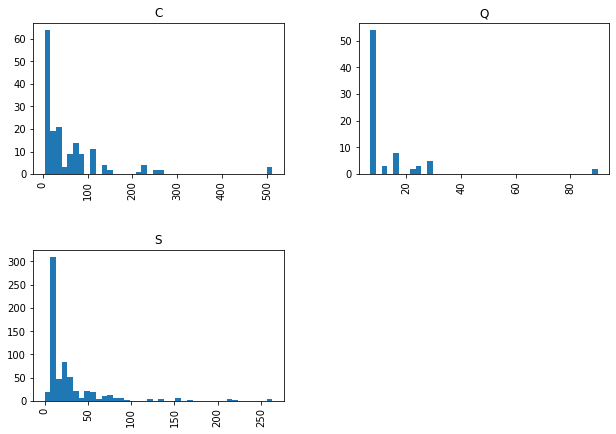

In [69]:
data.hist(column ='Fare', by ='Embarked', bins = 40, figsize = (10,7))
plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Не все, так как некоторые для каждого человека свои собственные, а также PassengerId - обычный номер строки, который и так есть

In [70]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [71]:
data.isnull().any().any()

True

In [72]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [73]:
data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [87]:
data['Age'].fillna(value = data['Age'].mean(), inplace = True)
data['Embarked'].fillna(value = 'S', inplace = True)
data['Cabin'].fillna(value = 'C', inplace = True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,C,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,C,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,C,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,C


### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [88]:
data.corr()['Fare']['Age']

0.09156609328505784

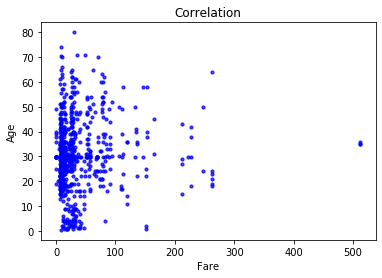

In [89]:
plt.subplots()
plt.scatter(data['Fare'], data['Age'], s = 10, color = 'b', alpha = 0.75)
plt.title('Correlation')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [90]:
d1 = data[data['Survived'] == 1]
print(d1['Fare'].mean() > data['Fare'].mean())
print(data.corr()['Survived']['Fare'])

True
0.2573065223849618


Так как у выживших стоимость билета выше среднего и существует положительная корреляция, то это верное утверждение

In [91]:
data.corr()['Pclass']['Survived']

-0.33848103596101586

А здесь получается, что чем выше класс, тем меньше шансов выжить :(

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [92]:
data['Family'] = data['SibSp'] + 1

Введем признак стоимости путешествия с семьи для каждого человека, предполагая, что они имеют одинаковые номера и одинаковые билеты, то есть считать будем как произведение стоимости билета ('Fare') на количество людей в семье ('Family')

In [94]:
data['FamFare'] = data['Family'] * data['Fare']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,FamFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,2,14.5000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,142.5666
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,106.2000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,1,8.0500


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

Из какого порта погрузки было больше шансов выжить?

In [95]:
s = data[(data['Embarked'] == 'S') & (data['Survived'] == 1)].shape[0]
c = data[(data['Embarked'] == 'C') & (data['Survived'] == 1)].shape[0]
q = data[(data['Embarked'] == 'Q') & (data['Survived'] == 1)].shape[0]
print('Количество выживших из Саутгемтона - ', s)
print('Количество выживших из Шербура - ', c)
print('Количество выживших из Квинстауна - ', q)
s_chances = s / data[data['Embarked'] == 'S'].shape[0]
c_chances = c / data[data['Embarked'] == 'C'].shape[0]
q_chances = q / data[data['Embarked'] == 'Q'].shape[0]
print('Шансы выжить, если ты уезжал из Саутгемтона - ', s_chances)
print('Шансы выжить, если ты уезжал из Шербура - ', c_chances)
print('Шансы выжить, если ты уезжал из Квинстауна - ', q_chances)
print('Город, из которого больше шансов выжить - Шербур, хотя из Саутгемтона в абсолютной величине больше выживших')

Количество выживших из Саутгемтона -  219
Количество выживших из Шербура -  93
Количество выживших из Квинстауна -  30
Шансы выжить, если ты уезжал из Саутгемтона -  0.33900928792569657
Шансы выжить, если ты уезжал из Шербура -  0.5535714285714286
Шансы выжить, если ты уезжал из Квинстауна -  0.38961038961038963
Город, из которого больше шансов выжить - Шербур, хотя из Саутгемтона в абсолютной величине больше выживших


### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

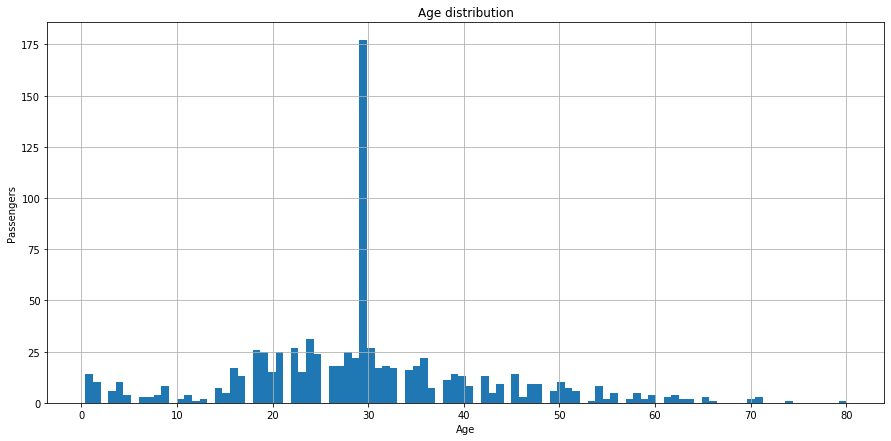

In [118]:
plt.figure(figsize=(15,7))
plt.title('Age distribution')
data['Age'].hist(bins = 100)
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.show()

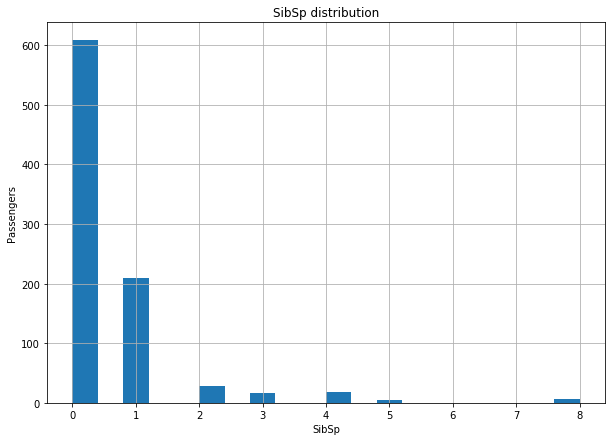

In [119]:
plt.figure(figsize=(10,7))
plt.title('SibSp distribution')
data['SibSp'].hist(bins = 20)
plt.xlabel('SibSp')
plt.ylabel('Passengers')
plt.show()

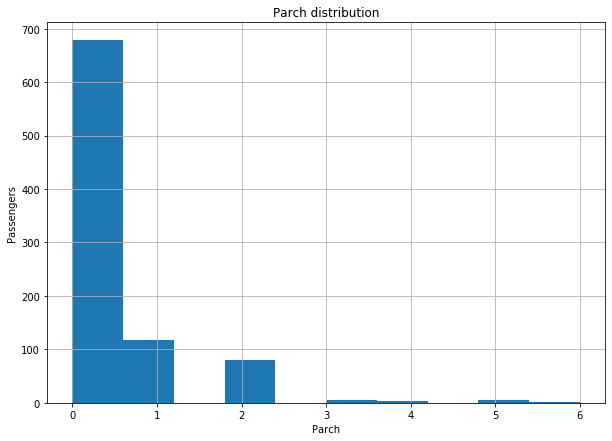

In [114]:
plt.figure(figsize=(10,7))
plt.title('Parch distribution')
data['Parch'].hist(bins = 10)
plt.xlabel('Parch')
plt.ylabel('Passengers')
plt.show()

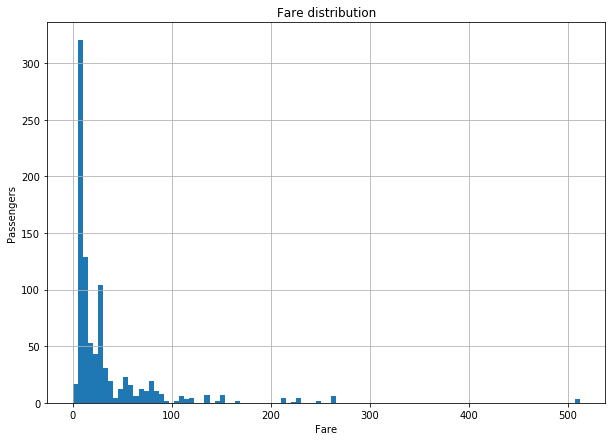

In [121]:
plt.figure(figsize=(10,7))
plt.title('Fare distribution')
data['Fare'].hist(bins = 100)
plt.xlabel('Fare')
plt.ylabel('Passengers')
plt.show()

Если распределение возраста, родственников и близких (родителей и детей) на борту имеют дискретные значения, что удобно для гистограмм, то стоимость билета зачастую имеет нецелое значение, поэтому гистограмма не подходит для этой величины.
Для машинного обучения это плохо тем, что на обучающей выборке будет происходить неправильное обучение (использование дискретных величин, а не вещественных), поэтому и предсказание будет неверным

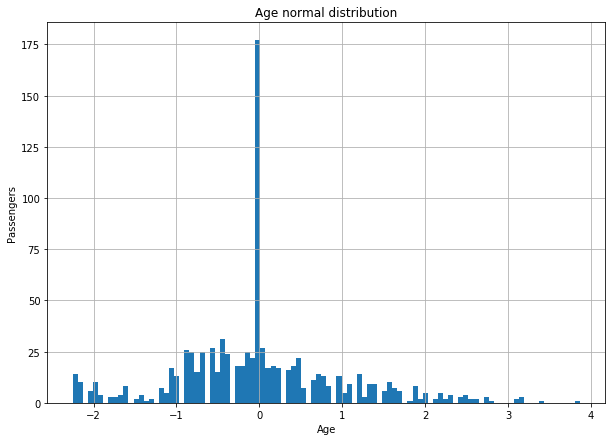

In [108]:
plt.figure(figsize=(10,7))
plt.title('Age normal distribution')
d1 = (data['Age'] - data['Age'].mean()) / (data['Age'].std())
d1.hist(bins = 100)    
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.show()

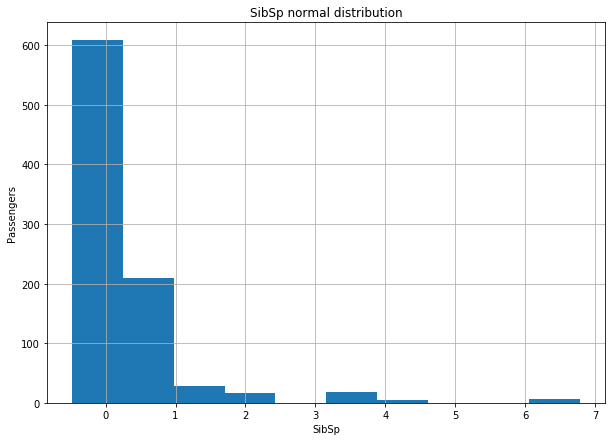

In [111]:
plt.figure(figsize=(10,7))
plt.title('SibSp normal distribution')
d1 = (data['SibSp'] - data['SibSp'].mean()) / (data['SibSp'].std())
d1.hist(bins = 10)
plt.xlabel('SibSp')
plt.ylabel('Passengers')
plt.show()

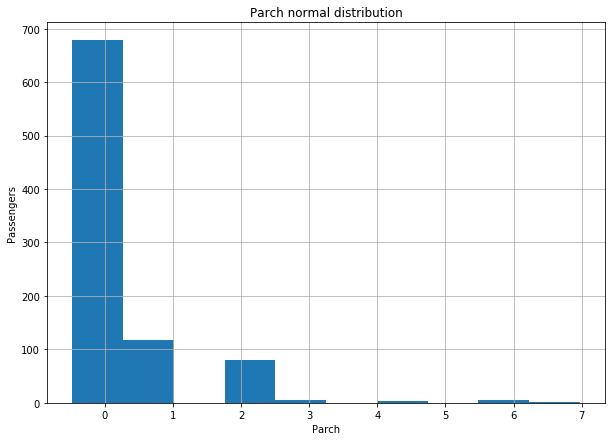

In [112]:
plt.figure(figsize=(10,7))
plt.title('Parch normal distribution')
d1 = (data['Parch'] - data['Parch'].mean()) / (data['Parch'].std())
d1.hist(bins = 10)
plt.xlabel('Parch')
plt.ylabel('Passengers')
plt.show()

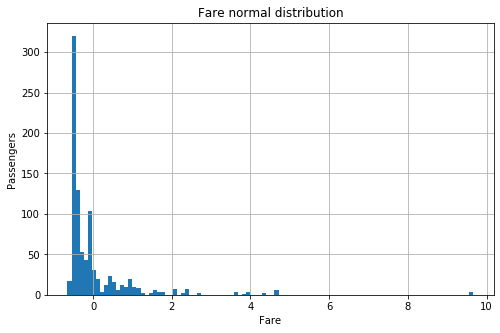

In [113]:
plt.figure(figsize=(8,5))
plt.title('Fare normal distribution')
d1 = (data['Fare'] - data['Fare'].mean()) / (data['Fare'].std())
d1.hist(bins = 100)
plt.xlabel('Fare')
plt.ylabel('Passengers')
plt.show()

Теперь каждое распределение недискретное, имеет вид нормального распределения,хотя сам вид гистограммы не поменялся, только поменялся масштаб по оси ординат, а также по оси абцисс появились отрицательные значения

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [115]:
data.loc[data[data.loc[:, 'Sex'] == 'male']['Sex'].index, 'Sex'] = 0
data.loc[data[data.loc[:, 'Sex'] == 'female']['Sex'].index, 'Sex'] = 1
data.loc[data[data.loc[:, 'Embarked'] == 'S']['Embarked'].index, 'Embarked'] = 1
data.loc[data[data.loc[:, 'Embarked'] == 'C']['Embarked'].index, 'Embarked'] = 2
data.loc[data[data.loc[:, 'Embarked'] == 'Q']['Embarked'].index, 'Embarked'] = 3

#### Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию `plt.subplots`. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots`. Также полезными могут оказаться параметры `bins`, `ec`, `density` функции `plt.hist`, а также функции `set_xlabel`, `set_ylabel`, `set_title` и `plt.tight_layout`.

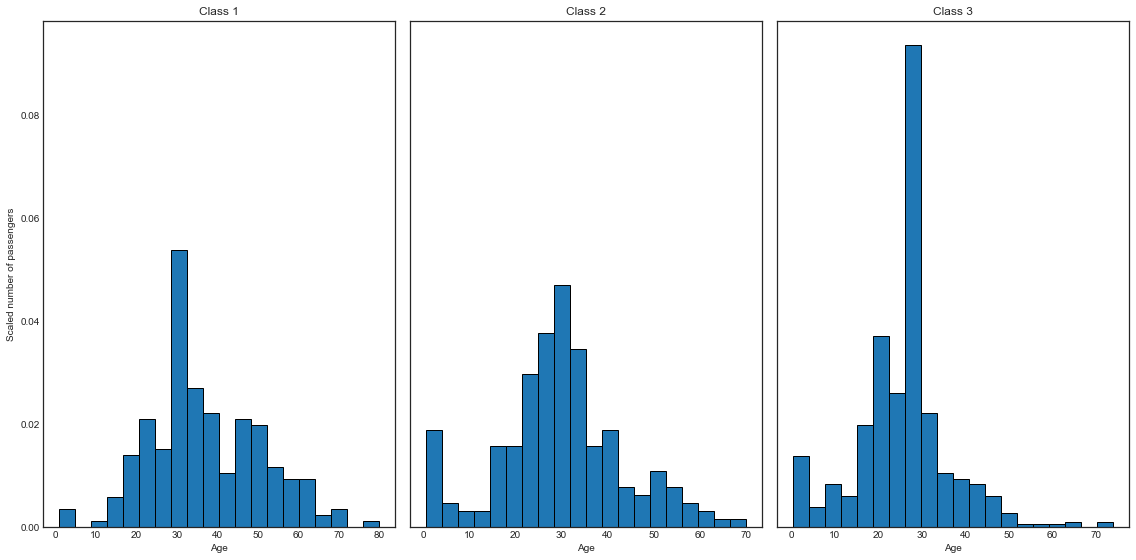

In [116]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(1, 3, sharex='col', sharey=True, figsize = (16,8))
ax[0].hist(data[data['Pclass'] == 1]['Age'], bins = 20, density = True, ec='k')
ax[1].hist(data[data['Pclass'] == 2]['Age'], bins = 20, density = True, ec='k')
ax[2].hist(data[data['Pclass'] == 3]['Age'], bins = 20, density = True, ec='k')
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
ax[2].set_xlabel('Age')
ax[0].set_ylabel('Scaled number of passengers')
ax[0].set_title('Class 1')
ax[1].set_title('Class 2')
ax[2].set_title('Class 3')
fig.tight_layout(pad=1.5)

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. Также пунктирной линией изобразите график синуса для `x` на том же промежутке. Укажите на графике легенду.

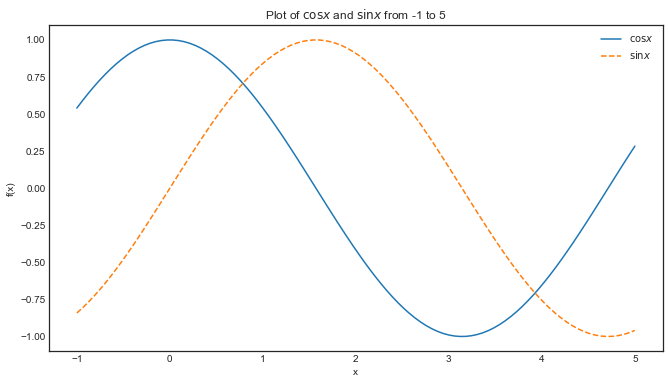

In [117]:
x = np.linspace(-1, 5, 100)
fig, ax = plt.subplots(figsize = (11, 6))
ax.plot(x, np.cos(x), label = '$\cos x$')
ax.plot(x, np.sin(x), linestyle = '--', label = '$\sin x$')
plt.title('Plot of $\cos x$ and $\sin x$ from -1 to 5')
plt.xlabel('x')
plt.ylabel('f(x)')
ax.legend()
plt.show()

### 27

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. Обозначьте выживших и погибших пассажиров разными светами и маркерами. Также укажите на графике легенду.

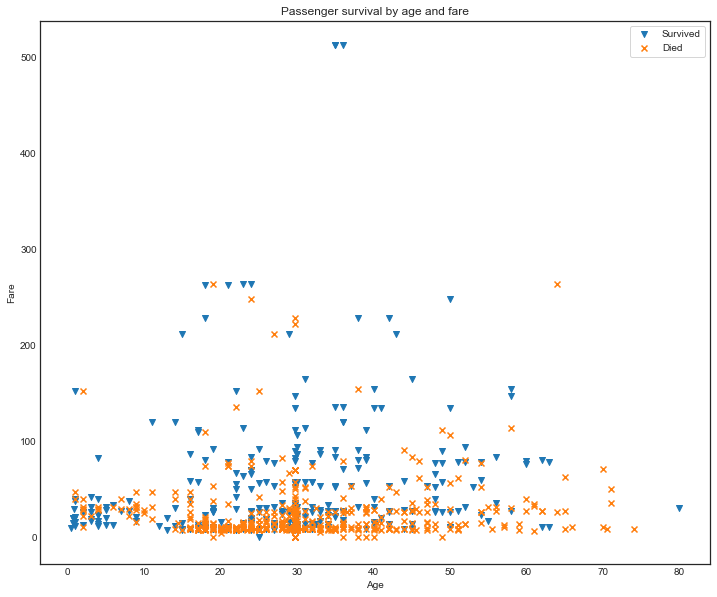

In [118]:
fig, ax = plt.subplots(figsize = (12, 10))
ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], marker = 'v', label = 'Survived')
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], marker='x', label = 'Died')
plt.title('Passenger survival by age and fare')
ax.legend(frameon = True);
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()